In [85]:
from qiskit.quantum_info import Statevector, random_clifford, Pauli
from qiskit_aer.primitives import Estimator
import numpy as np
from tomography.FastFidelity import Mean_Direct_Fidelity


In [86]:
num_qubits = 10

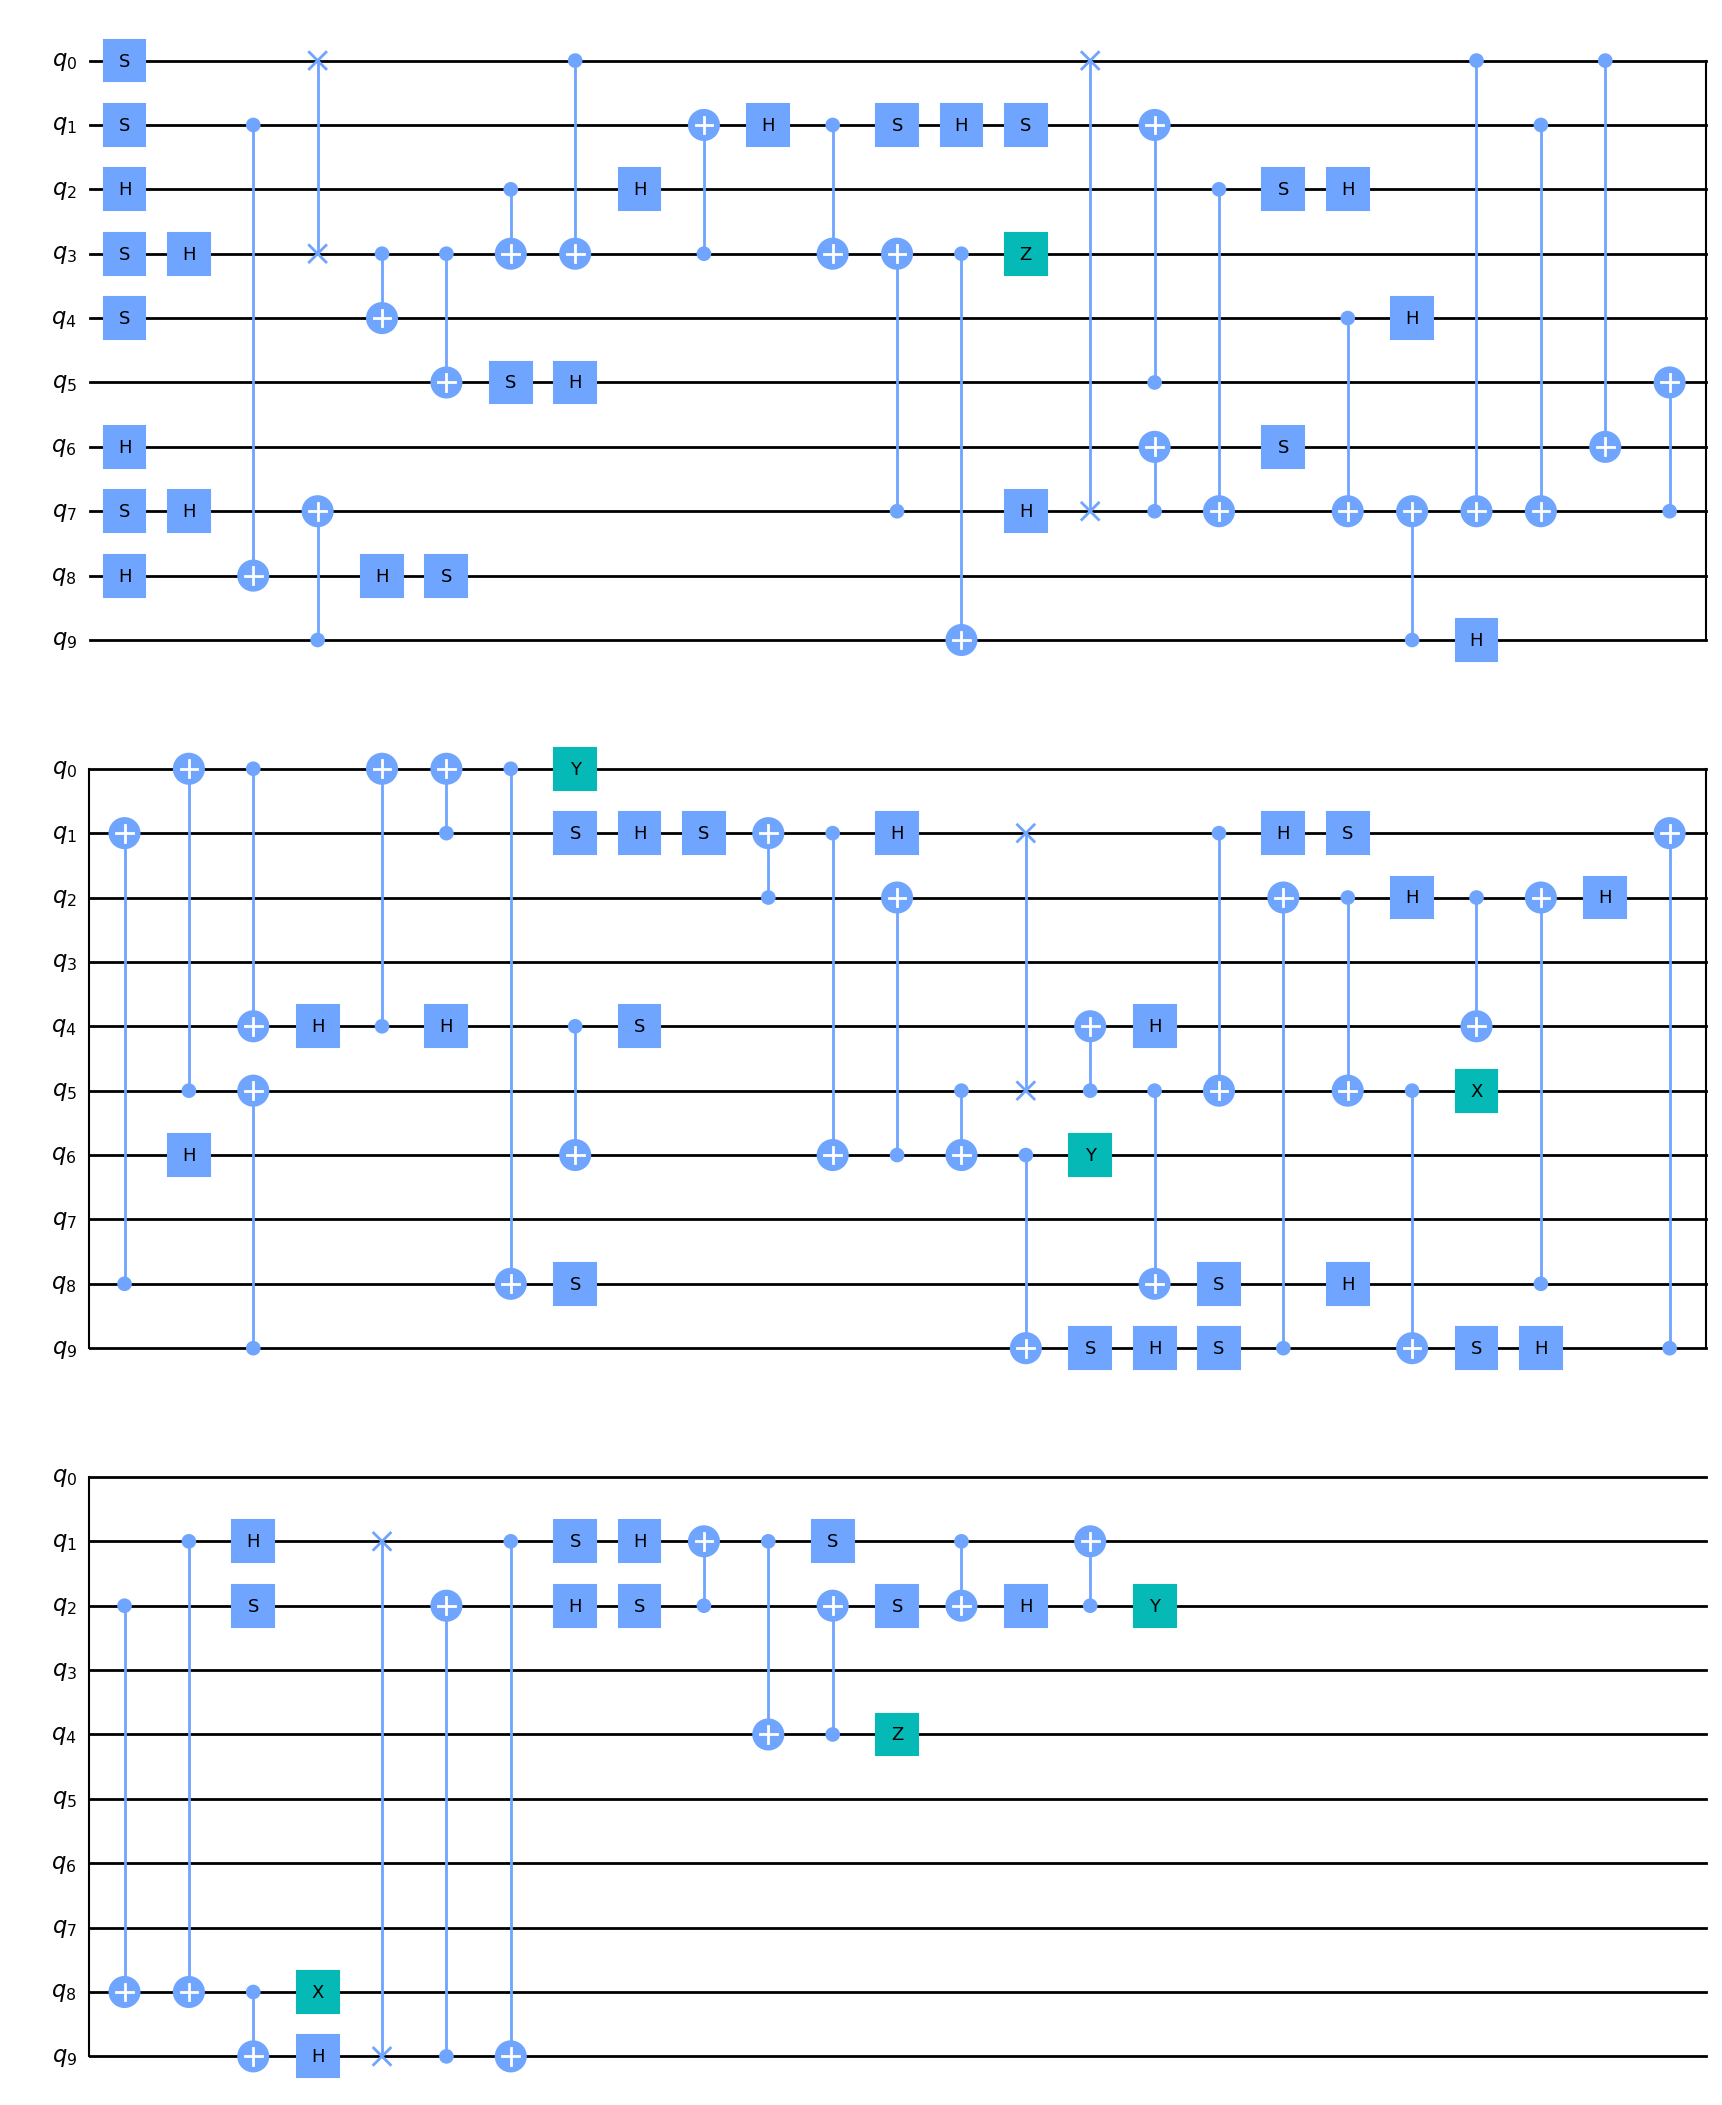

In [87]:
circuit = random_clifford( num_qubits ).to_circuit()
circuit.draw('mpl')

In [88]:
state = np.array( Statevector(circuit) )
rho   = np.outer(state,state.conj())
state 

array([-5.23045479e-19+5.44180820e-36j, -9.71463270e-19-4.41941738e-02j,
        5.23045479e-19-2.41228109e-35j, ...,
       -2.49798368e-18-4.41941738e-02j, -1.93022399e-18+2.41228109e-35j,
       -4.44091022e-18+4.41941738e-02j])

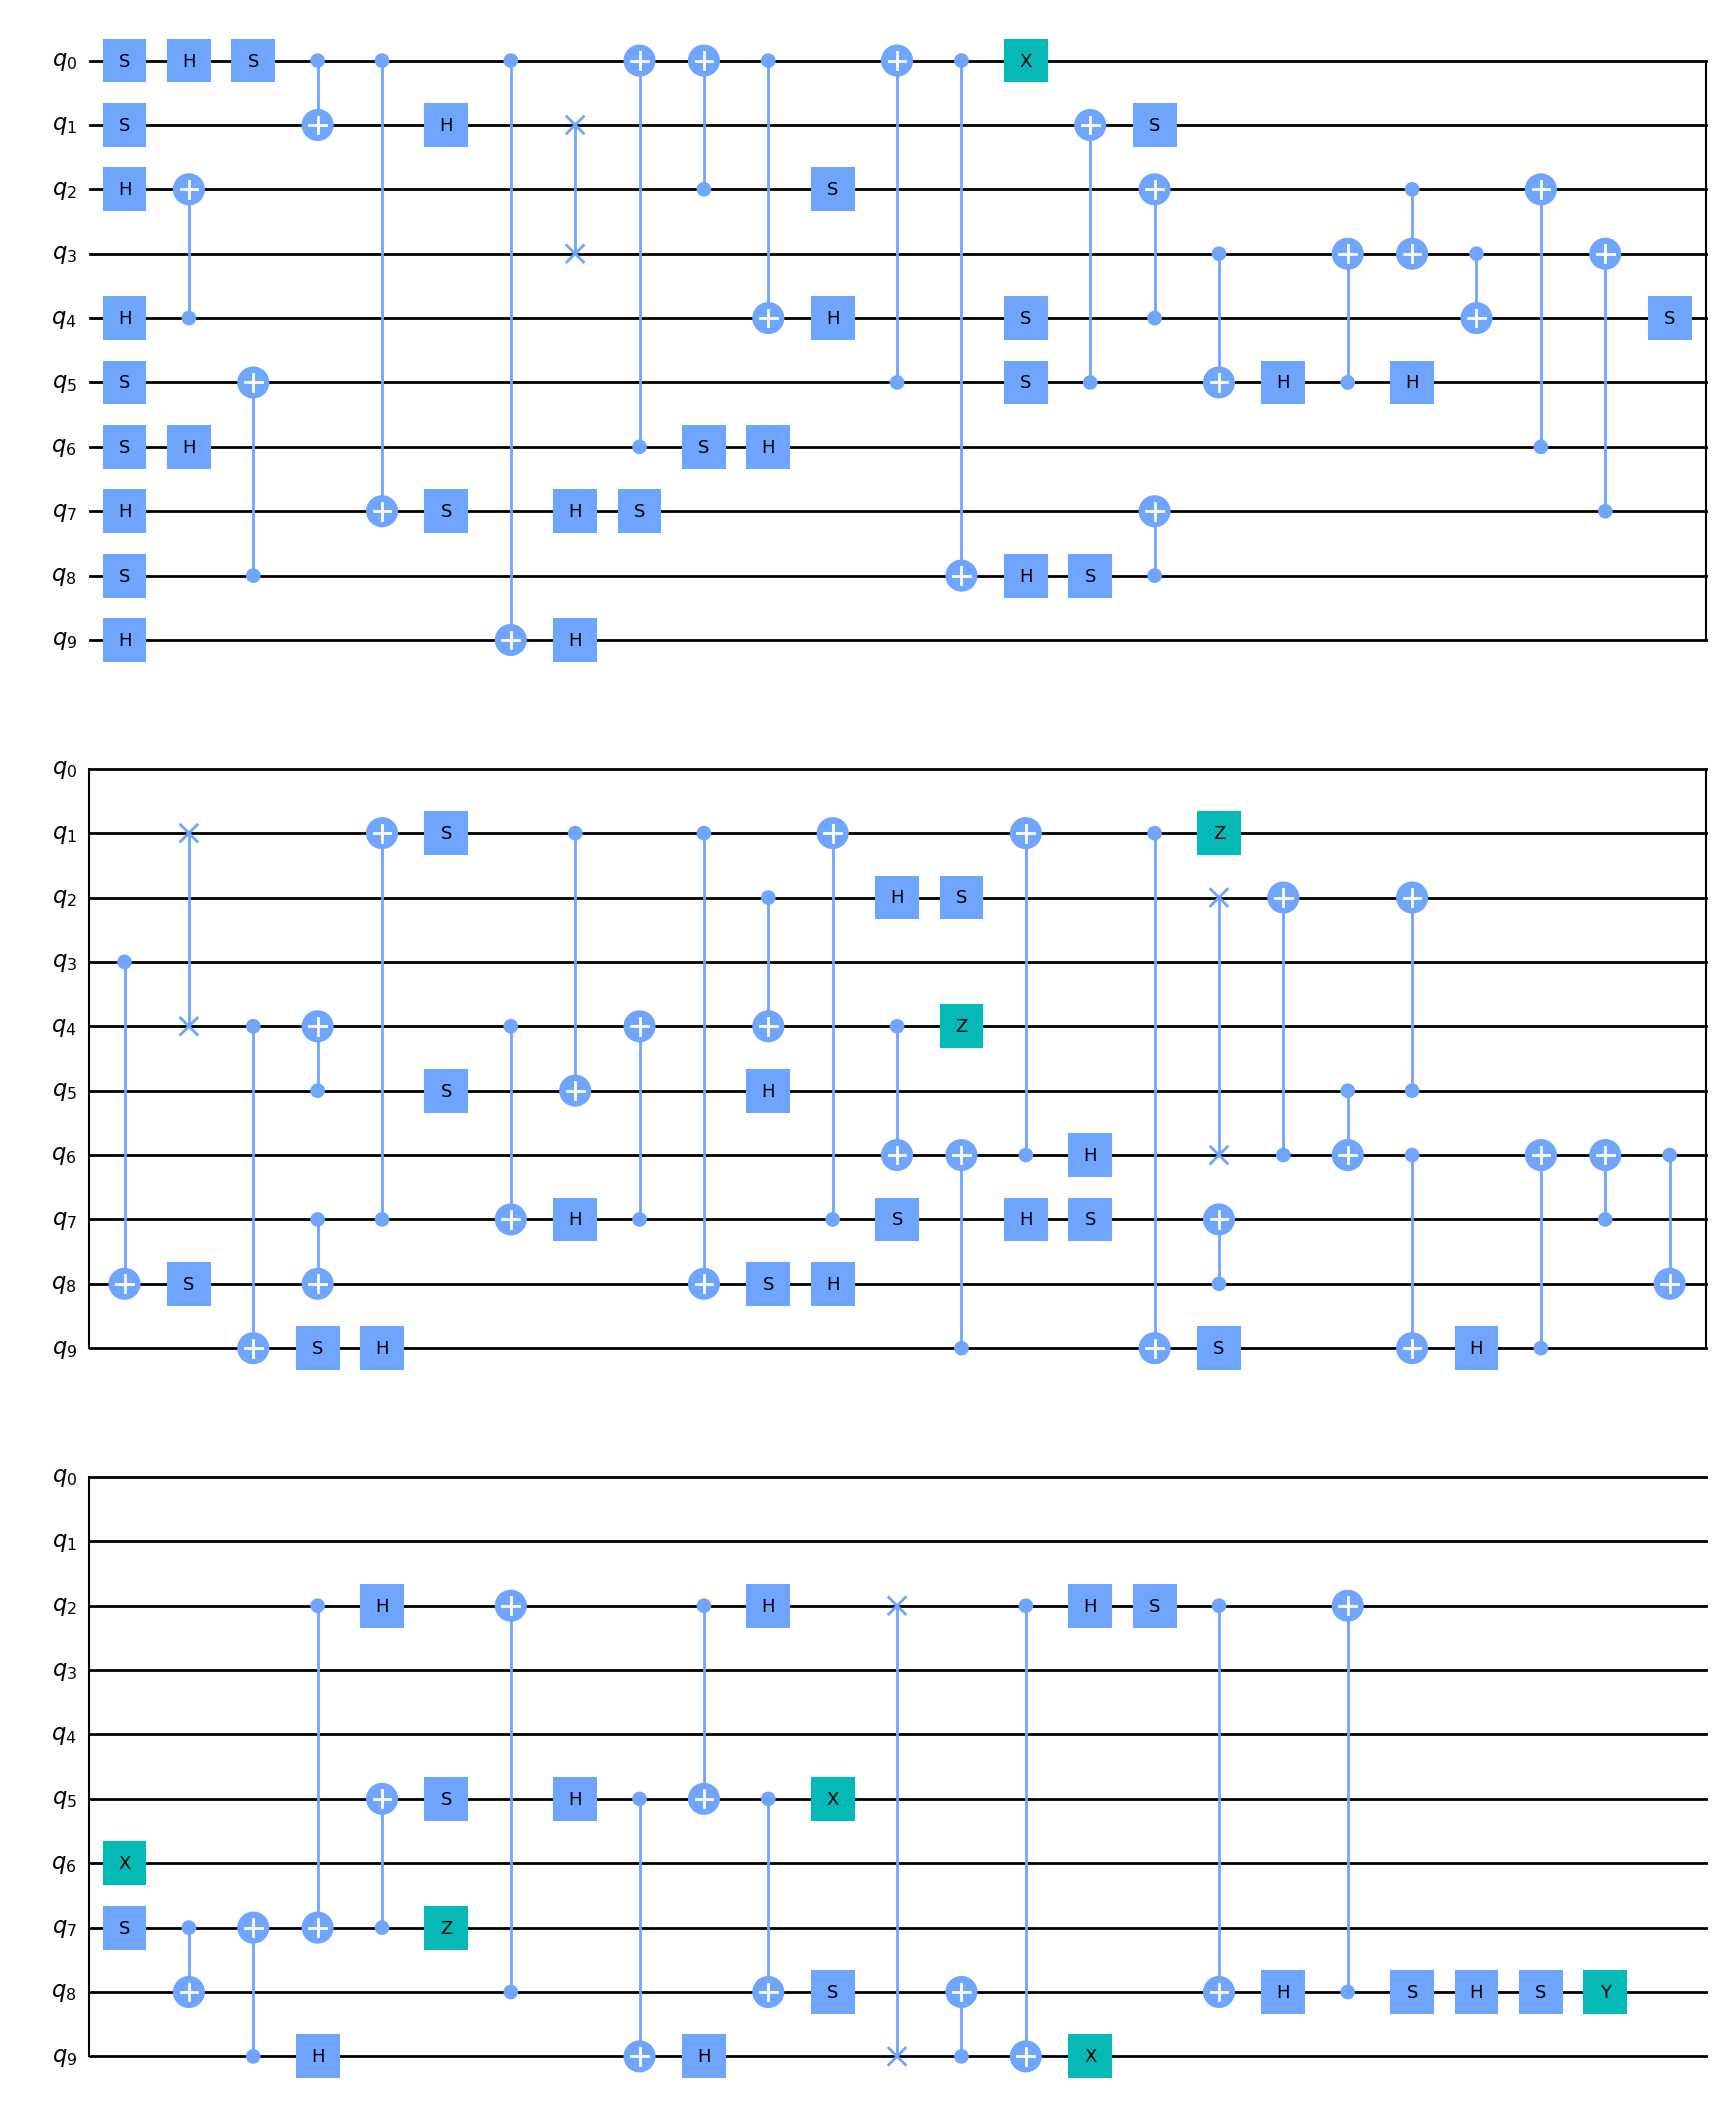

In [89]:
circuit2 = random_clifford( num_qubits ).to_circuit()
circuit2.draw('mpl')

In [90]:
state2 = np.array( Statevector(circuit2) )
rho2   = np.outer(state2,state2.conj())
# state2

In [91]:
MDF = Mean_Direct_Fidelity( num_qubits )

In [92]:
4**num_qubits, 4**num_qubits - np.sum( np.isclose( MDF.Chi( state ), 0 ) )

(1048576, 1024)

In [93]:
backend = Estimator(backend_options={'shots':1000,
                                        },
                        transpile_options={'optimization_level':0} ) 

backend_clifford = Estimator(backend_options={'shots':1000,
                                    'method':"stabilizer",
                                    },
                            transpile_options={'optimization_level':0} ) 


In [94]:
abs( np.vdot( state, state ) )**2 

0.9999999999999911

In [97]:
%%timeit
MDF.MeanFidelity(1, 1000, state, 
                circuit, estimator=backend, 
                shots=10000, truncation=False)

270 ms ± 6.28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [96]:
%%timeit
MDF.MeanFidelity(1, 1000, state, 
                circuit, estimator=backend_clifford, 
                shots=10000, truncation=False)

276 ms ± 15.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
